Alejandro Restrepo Giraldo CC: 1001389709

# Laboratorio 6.0

In [159]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [40]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [35]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
dicc = {'sepal length': X[:,0], 'sepal width': X[:,1], 'petal length':X[:,2] , 
        'petal width':X[:,3], 'class':Y }

In [38]:
df = pd.DataFrame(dicc)
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [47]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ] 
cols = [col.replace(")" ,"") for col in columns_name ] 
df.columns = cols

In [48]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [62]:
print("Número de datos:", df.shape)
print("Número de Null:", df.isnull().sum(1).sum())

Número de datos: (150, 5)
Número de Null: 0


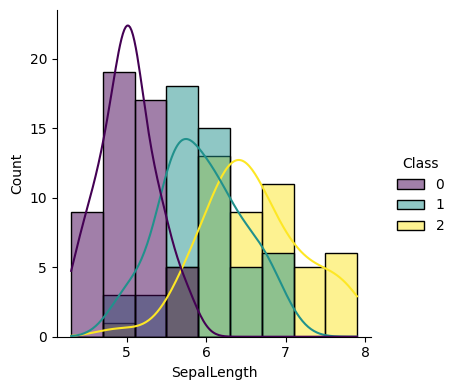

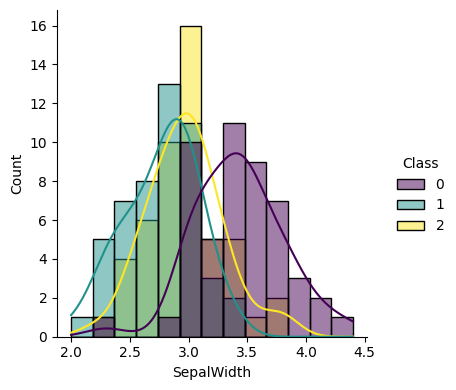

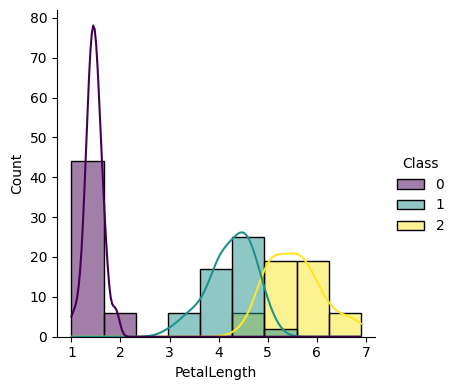

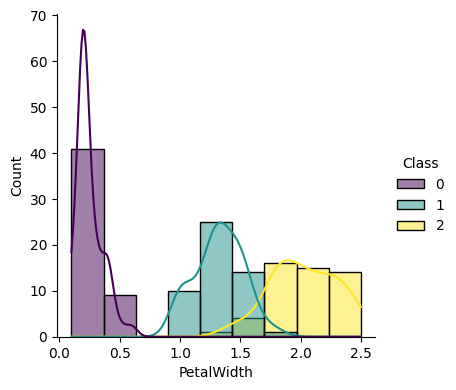

In [88]:
import seaborn as sns

sns.displot(df, x = "SepalLength", hue = "Class",  kde = True, height = 4, palette = 'viridis')
plt.xlabel('SepalLength')
plt.show()

# -----------------------------------------------------------

sns.displot(df, x = "SepalWidth", hue = "Class",  kde = True, height = 4, palette = 'viridis')
plt.xlabel('SepalWidth')
plt.show()

# -----------------------------------------------------------

sns.displot(df, x = "PetalLength", hue = "Class",  kde = True, height = 4, palette = 'viridis')
plt.xlabel('PetalLength')
plt.show()

# -----------------------------------------------------------

sns.displot(df, x = "PetalWidth", hue = "Class",  kde = True, height = 4, palette = 'viridis')
plt.xlabel('PetalWidth')
plt.show()

In [119]:
df.loc[:,'SepalLength':'PetalWidth'].corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.117570,0.871754,0.817941
SepalWidth,-0.117570,1.000000,-0.428440,-0.366126
PetalLength,0.871754,-0.428440,1.000000,0.962865
PetalWidth,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

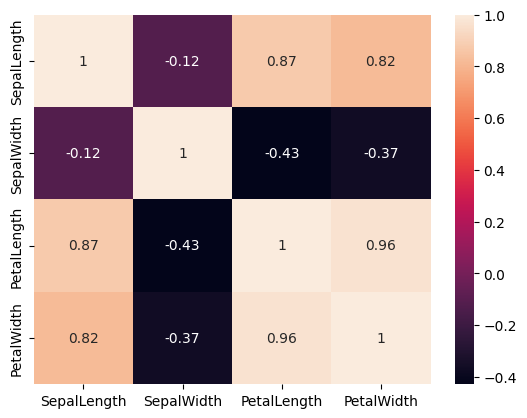

In [121]:
sns.heatmap(df.loc[:,'SepalLength':'PetalWidth'].corr(), annot=True)


In [153]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Class"]):

    strat_train_set = df.loc[train_index] 
    strat_test_set = df.loc[test_index]

In [154]:
print("Datos de entrenamiento: ")
strat_train_set

Datos de entrenamiento: 


,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
8,4.4,2.9,1.4,0.2,0
106,4.9,2.5,4.5,1.7,2
76,6.8,2.8,4.8,1.4,1
9,4.9,3.1,1.5,0.1,0
89,5.5,2.5,4.0,1.3,1
...,...,...,...,...,...
37,4.9,3.6,1.4,0.1,0
2,4.7,3.2,1.3,0.2,0
33,5.5,4.2,1.4,0.2,0
52,6.9,3.1,4.9,1.5,1


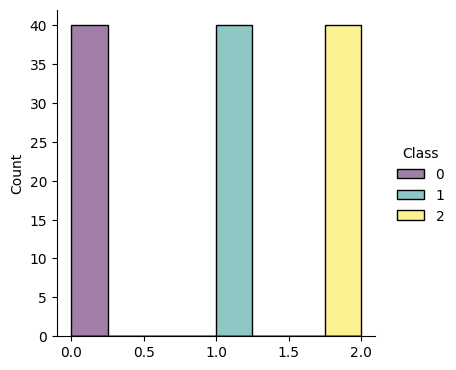

In [155]:
sns.displot(strat_train_set, x = "Class", hue = "Class", height = 4, palette = 'viridis')
plt.xlabel('')
plt.show()

In [156]:
print("Datos de test: ")
strat_test_set

Datos de test: 


,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
38,4.4,3.0,1.3,0.2,0
127,6.1,3.0,4.9,1.8,2
57,4.9,2.4,3.3,1.0,1
93,5.0,2.3,3.3,1.0,1
42,4.4,3.2,1.3,0.2,0
56,6.3,3.3,4.7,1.6,1
22,4.6,3.6,1.0,0.2,0
20,5.4,3.4,1.7,0.2,0
147,6.5,3.0,5.2,2.0,2
84,5.4,3.0,4.5,1.5,1


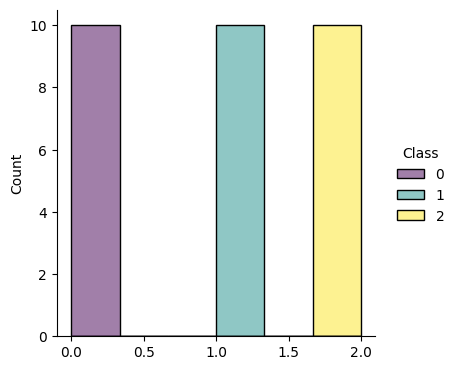

In [157]:
sns.displot(strat_test_set, x = "Class", hue = "Class",  kde = True, height = 4, palette = 'viridis')
plt.xlabel('')
plt.show()

In [165]:
clf = LogisticRegression().fit(strat_train_set.loc[:,"SepalLength":"PetalWidth"], strat_train_set.Class)

In [168]:
clf.score(strat_train_set.loc[:,"SepalLength":"PetalWidth"], strat_train_set.Class)

0.975

In [166]:
clf.predict(strat_test_set.loc[:,"SepalLength":"PetalWidth"])

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [167]:
clf.score(strat_test_set.loc[:,"SepalLength":"PetalWidth"], strat_test_set.Class)

0.9666666666666667

In [174]:
X_new = np.linspace(-10, 10, 1000).reshape(250, 4)

#Generamos los valores de X_new 

prob = clf.predict_proba(X_new)

prob
#decision_boundary = X_new[prob[:, 0] >= 0.5] 

#decision_boundary

/home/usuario/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[1.00000000e+00, 4.64373431e-14, 4.07288042e-40],
       [1.00000000e+00, 5.55868220e-14, 7.07674867e-40],
       [1.00000000e+00, 6.65390088e-14, 1.22960575e-39],
       [1.00000000e+00, 7.96490883e-14, 2.13647589e-39],
       [1.00000000e+00, 9.53422267e-14, 3.71218926e-39],
       [1.00000000e+00, 1.14127360e-13, 6.45003724e-39],
       [1.00000000e+00, 1.36613700e-13, 1.12071281e-38],
       [1.00000000e+00, 1.63530489e-13, 1.94727123e-38],
       [1.00000000e+00, 1.95750652e-13, 3.38344063e-38],
       [1.00000000e+00, 2.34319104e-13, 5.87882690e-38],
       [1.00000000e+00, 2.80486640e-13, 1.02146334e-37],
       [1.00000000e+00, 3.35750496e-13, 1.77482238e-37],
       [1.00000000e+00, 4.01902904e-13, 3.08380572e-37],
       [1.00000000e+00, 4.81089220e-13, 5.35820250e-37],
       [1.00000000e+00, 5.75877496e-13, 9.31003332e-37],
       [1.00000000e+00, 6.89341761e-13, 1.61764548e-36],
       [1.00000000e+00, 8.25161717e-13, 2.81070626e-36],
       [1.00000000e+00, 9.87742